# 1. Setup and Data Loading

In [2]:
!pip install billboard.py

In [3]:
!pip -q install pandas pyarrow

## import

In [13]:
import billboard as b
import pandas as pd
import os
import numpy as np
from collections import Counter
import re
from sklearn.feature_extraction.text import *
from scipy.sparse import hstack
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import *
import joblib
from sklearn.linear_model import *
from sklearn.svm import *
import json

## data

In [14]:
file_names = {
    "song_data": "monthly_song_2000~2023.csv",
    "lyrics_data": "billboard_24years_lyrics_spotify.csv",
    "audio_data": "audio_features_100songs.csv",
    "new_audio_data": "audio_features_audio2.csv"
}

In [15]:
def load_data(path):
    if os.path.exists(path):
        print(f"success {path}")
        return pd.read_csv(path)
    else:
        print(f"error: '{path}' no file.")
        return None

In [18]:
song = load_data(file_names["song_data"])
lyrics = load_data(file_names["lyrics_data"])
audio = load_data(file_names["audio_data"])
new_audio_df = load_data(file_names["new_audio_data"])

success monthly_song_2000~2023.csv
success billboard_24years_lyrics_spotify.csv
success audio_features_100songs.csv
success audio_features_audio2.csv


In [20]:
if song is not None and lyrics is not None:
    print("all file ready")
else:
    print("file missing")

all file ready


In [21]:
lyrics_data = 'billboard_24years_lyrics_spotify.csv'
df = pd.read_csv(lyrics_data)
df.head(3)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,I can feel the magic floating in the air\nBein...,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,...,0.000000,0.251,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0
1,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,...,0.000005,0.295,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0
2,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,...,0.807000,0.299,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ranking           3397 non-null   int64  
 1   song              3397 non-null   object 
 2   band_singer       3397 non-null   object 
 3   songurl           3397 non-null   object 
 4   titletext         3397 non-null   object 
 5   url               3397 non-null   object 
 6   year              3397 non-null   int64  
 7   lyrics            3397 non-null   object 
 8   uri               3397 non-null   object 
 9   danceability      486 non-null    float64
 10  energy            486 non-null    float64
 11  key               486 non-null    float64
 12  loudness          486 non-null    float64
 13  mode              486 non-null    float64
 14  speechiness       486 non-null    float64
 15  acousticness      486 non-null    float64
 16  instrumentalness  486 non-null    float64


In [23]:
df['lyrics']

,lyrics
0,I can feel the magic floating in the air\nBein...
1,"Man, it's a hot one\nLike seven inches from th..."
2,"Man, it's a hot one\nLike seven inches from th..."
3,"Ladies and gents, turn up your sound systems\n..."
4,Turn up this sound system\nTo the sound of Car...
...,...
3392,It was right after senior year\nJust before th...
3393,When I need motivation\nMy one solution is my ...
3394,When I need motivation\nMy one solution is my ...
3395,My face above the water\nMy feet can't touch t...


In [24]:
temp = df.loc[2, 'lyrics']
temp

'Man, it\'s a hot one\nLike seven inches from the midday sun\nWell, I hear you whisper and the words melt everyone\nBut you stay so cool\nMy muñequita, my Spanish Harlem Mona Lisa\nYou\'re my reason for reason, the step in my groove, yeah\n\nAnd if you say, "This life ain\'t good enough"\nI would give my world to lift you up\nI could change my life to better suit your mood\n\'Cause you\'re so smooth\n\nAnd it\'s just like the ocean under the moon\nWell, it\'s the same as the emotion that I get from you\nYou got the kind of lovin\' that can be so smooth\nGimme your heart, make it real, or else forget about it\n\nWell, I\'ll tell you one thing\nIf you would leave it\'d be a crying shame\nIn every breath and every word\nI hear your name callin\' me out\nOut from the barrio, you hear my rhythm on the radio\nYou feel the turning of the world so soft and slow\nTurnin\' you round and round\nYou might also like\nAnd if you say, "This life ain\'t good enough"\nI would give my world to lift you 

In [25]:
song.head(3)

,date,year,month,rank,title,artist,weeks
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23
1,2000-01-01,2000,1,2,Back At One,Brian McKnight,19
2,2000-01-01,2000,1,3,I Wanna Love You Forever,Jessica Simpson,12


In [26]:
lyrics.head(3)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,I can feel the magic floating in the air\nBein...,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,...,0.000000,0.251,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0
1,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,...,0.000005,0.295,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0
2,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,...,0.807000,0.299,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0


In [27]:
merged_df = pd.merge(
    song,
    lyrics,
    left_on = 'title',
    right_on = 'song',
    how = 'inner',
    suffixes = ('_song', '_lyrics')
)

result_unique = (merged_df
    .dropna(subset = ['lyrics'])
    .drop_duplicates(subset = ['title'])
    .sort_values(by = 'year_song', ascending = False)
    .head(100))

result_unique

,date,year_song,month,rank,title,artist,weeks,ranking,song,band_singer,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
21255,2023-04-01,2023,4,26,Ella Baila Sola,Eslabon Armado X Peso Pluma,1,26,Ella Baila Sola,Eslabon Armado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21269,2023-04-01,2023,4,39,Ain't That Some,Morgan Wallen,3,92,Ain't That Some,Morgan Wallen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21676,2023-10-01,2023,10,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,5,74,I Remember Everything,Zach Bryan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21636,2023-09-01,2023,9,22,Meltdown,Travis Scott Featuring Drake,4,97,Meltdown,Travis Scott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21603,2023-08-01,2023,8,61,Watermelon Moonshine,Lainey Wilson,5,100,Watermelon Moonshine,Lainey Wilson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19498,2021-05-01,2021,5,89,Lil Bit,Nelly & Florida Georgia Line,5,70,Lil Bit,Nelly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20028,2021-11-01,2021,11,88,Big Energy,Latto,1,7,Big Energy,Latto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20024,2021-11-01,2021,11,65,'Til You Can't,Cody Johnson,3,34,'Til You Can't,Cody Johnson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19946,2021-10-01,2021,10,80,Love Nwantiti (Ah Ah Ah),CKay,1,55,Love Nwantiti (Ah Ah Ah),CKay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# merged_df -> 2000 ~ 2023 song data
# result_unique -> top 100 song

## save merged dataframe to download top 100 songs

In [31]:
result_unique.to_csv('song100.csv', index=False, encoding='utf-8')

# Audio dataset with mfcc

In [33]:
audio.head(3)

,filename,low_ratio,mid_ratio,high_ratio,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,...,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13
0,Bad Bunny & Bomba Estereo_Ojitos Lindos.wav,0.346197,0.642525,0.011278,-209.203079,182.064758,-2.384764,40.098114,-1.102309,6.859411,...,31.488724,23.063513,14.765157,16.040352,12.071749,11.587193,10.576082,10.226145,13.103971,9.926713
1,Bad Bunny & Chencho Corleone_Me Porto Bonito.wav,0.695150,0.298872,0.005978,-232.624298,115.545059,7.741221,28.303684,9.890562,24.111898,...,17.881668,18.928959,14.657878,24.288233,12.170394,11.735451,15.774083,12.665260,12.378709,10.191256
2,Bad Bunny_Efecto.wav,0.617687,0.377578,0.004735,-263.571075,138.516769,10.775496,38.367397,-1.038293,26.877401,...,22.494196,21.434317,22.365086,15.909713,12.626781,13.847604,15.169734,11.067740,12.742627,11.131393


In [34]:
temp = audio['filename'].str.replace('.wav', '', regex = False)
split = temp.str.split('_', n = 1, expand = True)
split.head(3)

,0,1
0,Bad Bunny & Bomba Estereo,Ojitos Lindos
1,Bad Bunny & Chencho Corleone,Me Porto Bonito
2,Bad Bunny,Efecto


In [35]:
audio['merge_artist'] = split[0].astype(str).str.strip().str.lower()
audio['merge_title'] = split[1].astype(str).str.strip().str.lower()

audio[['filename', 'merge_artist', 'merge_title']].head(3)
# audio.head(3)

,filename,merge_artist,merge_title
0,Bad Bunny & Bomba Estereo_Ojitos Lindos.wav,bad bunny & bomba estereo,ojitos lindos
1,Bad Bunny & Chencho Corleone_Me Porto Bonito.wav,bad bunny & chencho corleone,me porto bonito
2,Bad Bunny_Efecto.wav,bad bunny,efecto


# 2. Audio Feature Preprocessing

In [36]:
audio_clean = audio[['merge_artist', 'merge_title', 'low_ratio', 'mid_ratio', 'high_ratio']].copy()
audio_clean.head(3)

,merge_artist,merge_title,low_ratio,mid_ratio,high_ratio
0,bad bunny & bomba estereo,ojitos lindos,0.346197,0.642525,0.011278
1,bad bunny & chencho corleone,me porto bonito,0.695150,0.298872,0.005978
2,bad bunny,efecto,0.617687,0.377578,0.004735


In [37]:
merged_df.head(2)

,date,year_song,month,rank,title,artist,weeks,ranking,song,band_singer,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,2,Smooth,Santana,...,0.000005,0.295,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0
1,2000-01-01,2000,1,1,Smooth,Santana Featuring Rob Thomas,23,2,Smooth,Rob Thomas,...,0.807000,0.299,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0


In [38]:
merged_df['merge_artist'] = merged_df['artist'].astype(str).str.strip().str.lower()
merged_df['merge_title'] = merged_df['title'].astype(str).str.strip().str.lower()
merged_df[['merge_artist', 'merge_title']].head(3)

,merge_artist,merge_title
0,santana featuring rob thomas,smooth
1,santana featuring rob thomas,smooth
2,jessica simpson,i wanna love you forever


In [39]:
unique_songs = merged_df.groupby(['merge_artist', 'merge_title'], as_index = False).agg({
    'rank': 'min',
    'lyrics': 'first',
    'year_song': 'first'
})
unique_songs.head(10)

,merge_artist,merge_title,rank,lyrics,year_song
0,*nsync,bye bye bye,5,"Hey, hey\nBye, bye, bye\nBye, bye\nBye, bye (O...",2000
1,*nsync,gone,11,There's a thousand words that I could say\nTo ...,2001
2,*nsync,it's gonna be me,1,"(It's gonna be me)\nOoh, yeah\n\nYou might've ...",2000
3,*nsync,this i promise you,5,"Oh, oh, oh, oh\nOh, ooh\n\nWhen the visions ar...",2000
4,*nsync featuring nelly,girlfriend,5,Would you be my girlfriend?\nWould you be my g...,2002
5,112,it's over now,32,"What is this, numbers in your pocket?\nI remem...",2001
6,112,peaches & cream,4,It's the S the L the I the M\n\nLet me tell yo...,2001
7,112 featuring foxy brown,u already know,37,"Uh, 112\nUh, Oh baba-ba-baby\n\nTonight's your...",2005
8,2 chainz,i'm different,27,"Yeah\nYeah\n2 Chainz\nMustard on the beat, ho!...",2012
9,2 chainz featuring drake,no lie,28,"EarDrummers, Mike WiLL Made-It\nYah! T.R.U., 2...",2012


In [40]:
audio_clean.head()

,merge_artist,merge_title,low_ratio,mid_ratio,high_ratio
0,bad bunny & bomba estereo,ojitos lindos,0.346197,0.642525,0.011278
1,bad bunny & chencho corleone,me porto bonito,0.695150,0.298872,0.005978
2,bad bunny,efecto,0.617687,0.377578,0.004735
3,bad bunny,moscow mule,0.638531,0.351680,0.009789
4,bad bunny,where she goes,0.313138,0.680006,0.006856


In [41]:
final_df = pd.merge(unique_songs, audio_clean, on = ['merge_artist', 'merge_title'], how = 'inner')
final_df.head(3)

,merge_artist,merge_title,rank,lyrics,year_song,low_ratio,mid_ratio,high_ratio
0,bad bunny,efecto,35,\nYeah-yeah-yeah-yeah-yeah-yeah\nEh-eh-eh-eh\n...,2022,0.617687,0.377578,0.004735
1,bad bunny,moscow mule,17,"\nSi yo no te escribo, tú no me escribe', ey\n...",2022,0.638531,0.351680,0.009789
2,bad bunny,where she goes,8,"\nBaby, dime la verdad\nSi te olvidaste de mí\...",2023,0.313138,0.680006,0.006856


In [42]:
final_df['lyrics'].head(5)

,lyrics
0,\nYeah-yeah-yeah-yeah-yeah-yeah\nEh-eh-eh-eh\n...
1,"\nSi yo no te escribo, tú no me escribe', ey\n..."
2,"\nBaby, dime la verdad\nSi te olvidaste de mí\..."
3,\nHace mucho tiempo le hago caso al corazón\nY...
4,"\nYeah-yeah-yeah-yeah-yeah-yeah, ey\nEn la gua..."


In [43]:
final_df.isnull().sum()

,0
merge_artist,0
merge_title,0
rank,0
lyrics,0
year_song,0
low_ratio,0
mid_ratio,0
high_ratio,0


In [44]:
def clean_lyrics(text):
    text = str(text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

In [45]:
final_df['lyrics_clean'] = final_df['lyrics'].apply(clean_lyrics)
final_df['lyrics_clean'].head(5)

,lyrics_clean
0,yeahyeahyeahyeahyeahyeah eheheheh no s si es c...
1,si yo no te escribo t no me escribe ey si t qu...
2,baby dime la verdad si te olvidaste de m yo s ...
3,hace mucho tiempo le hago caso al corazn y pas...
4,yeahyeahyeahyeahyeahyeah ey en la guagua se qu...


In [46]:
texts = final_df['lyrics_clean'].astype(str)
audio_features = final_df[['low_ratio', 'mid_ratio', 'high_ratio']]
texts.head(3)

,lyrics_clean
0,yeahyeahyeahyeahyeahyeah eheheheh no s si es c...
1,si yo no te escribo t no me escribe ey si t qu...
2,baby dime la verdad si te olvidaste de m yo s ...


# 3. Feature Engineering (Combining Audio & Lyrics)

In [47]:
# vectorizer = TfidfVectorizer() too long
vectorizer = TfidfVectorizer(max_features = 50, stop_words = 'english')
X_text = vectorizer.fit_transform(final_df['lyrics_clean'])
X_text.shape[1]

50

In [48]:
scaler = StandardScaler()
X_audio = scaler.fit_transform(final_df[['low_ratio', 'mid_ratio', 'high_ratio']])

In [49]:
X_combined = hstack([X_text, X_audio])

In [50]:
y = (final_df['rank'] <= 30).astype(int)

# 4. Model Training: Random Forest Classifier

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.85

In [52]:
model = LogisticRegression(random_state = 42)
# model = SVC(probability = True, random_state = 42)

model.fit(X_train, y_train)
print('model acc:', model.score(X_test, y_test))

model acc: 0.85


In [53]:
def predict_my_song(my_lyrics, low, mid, high):
    clean_text = clean_lyrics(my_lyrics)
    text_vec = vectorizer.transform([clean_text])

    audio_vec = scaler.transform([[low, mid, high]])
    input_data = hstack([text_vec, audio_vec])
    score = model.predict_proba(input_data)[0][1] * 100


    print(f"% of this song can get in Billboard top 30: {score:.2f}%")
    print("")

    if score >= 80:
        print("Nice!! This song will be highly get in Billboard top 30")
    elif score >= 50:
        print("Hmm... This song might be get in Billboard top 30")
    else:
        print("Sorry, It will be hard to get in Billboard chart..")

    print("")

In [54]:
# write your own lyrics and test it!

die_with_a_smile = """
If the world was ending I'd want to be next to you
If the party was over and our time on earth was through
I'd wanna hold you just for a while
and die with a smile
If the world was ending I'd want to be next to you
"""

In [55]:
predict_my_song(die_with_a_smile, low = 0.1, mid = 0.2, high = 0.3)

% of this song can get in Billboard top 30: 72.83%

Hmm... This song might be get in Billboard top 30



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
stay = """
I do the same thing I told you that I never would
I told you I'd change, even when I knew I never could
I know that I can't find nobody else as good as you
I need you to stay, need you to stay, hey (oh)
"""
predict_my_song(stay, low=0.3, mid=0.4, high=0.5)

% of this song can get in Billboard top 30: 69.10%

Hmm... This song might be get in Billboard top 30



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#========================================================

In [57]:
final_df.head(3)

,merge_artist,merge_title,rank,lyrics,year_song,low_ratio,mid_ratio,high_ratio,lyrics_clean
0,bad bunny,efecto,35,\nYeah-yeah-yeah-yeah-yeah-yeah\nEh-eh-eh-eh\n...,2022,0.617687,0.377578,0.004735,yeahyeahyeahyeahyeahyeah eheheheh no s si es c...
1,bad bunny,moscow mule,17,"\nSi yo no te escribo, tú no me escribe', ey\n...",2022,0.638531,0.351680,0.009789,si yo no te escribo t no me escribe ey si t qu...
2,bad bunny,where she goes,8,"\nBaby, dime la verdad\nSi te olvidaste de mí\...",2023,0.313138,0.680006,0.006856,baby dime la verdad si te olvidaste de m yo s ...


In [58]:
audio.head(3)

,filename,low_ratio,mid_ratio,high_ratio,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,...,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,merge_artist,merge_title
0,Bad Bunny & Bomba Estereo_Ojitos Lindos.wav,0.346197,0.642525,0.011278,-209.203079,182.064758,-2.384764,40.098114,-1.102309,6.859411,...,14.765157,16.040352,12.071749,11.587193,10.576082,10.226145,13.103971,9.926713,bad bunny & bomba estereo,ojitos lindos
1,Bad Bunny & Chencho Corleone_Me Porto Bonito.wav,0.695150,0.298872,0.005978,-232.624298,115.545059,7.741221,28.303684,9.890562,24.111898,...,14.657878,24.288233,12.170394,11.735451,15.774083,12.665260,12.378709,10.191256,bad bunny & chencho corleone,me porto bonito
2,Bad Bunny_Efecto.wav,0.617687,0.377578,0.004735,-263.571075,138.516769,10.775496,38.367397,-1.038293,26.877401,...,22.365086,15.909713,12.626781,13.847604,15.169734,11.067740,12.742627,11.131393,bad bunny,efecto


In [60]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filename      100 non-null    object 
 1   low_ratio     100 non-null    float64
 2   mid_ratio     100 non-null    float64
 3   high_ratio    100 non-null    float64
 4   mfcc_mean_1   100 non-null    float64
 5   mfcc_mean_2   100 non-null    float64
 6   mfcc_mean_3   100 non-null    float64
 7   mfcc_mean_4   100 non-null    float64
 8   mfcc_mean_5   100 non-null    float64
 9   mfcc_mean_6   100 non-null    float64
 10  mfcc_mean_7   100 non-null    float64
 11  mfcc_mean_8   100 non-null    float64
 12  mfcc_mean_9   100 non-null    float64
 13  mfcc_mean_10  100 non-null    float64
 14  mfcc_mean_11  100 non-null    float64
 15  mfcc_mean_12  100 non-null    float64
 16  mfcc_mean_13  100 non-null    float64
 17  mfcc_std_1    100 non-null    float64
 18  mfcc_std_2    100 non-null    f

In [61]:
numeric_cols = audio.select_dtypes(include = [np.number]).columns.tolist()
# numeric_cols

Text(0.5, 1.0, 'heatmap : audio features vs song rank')

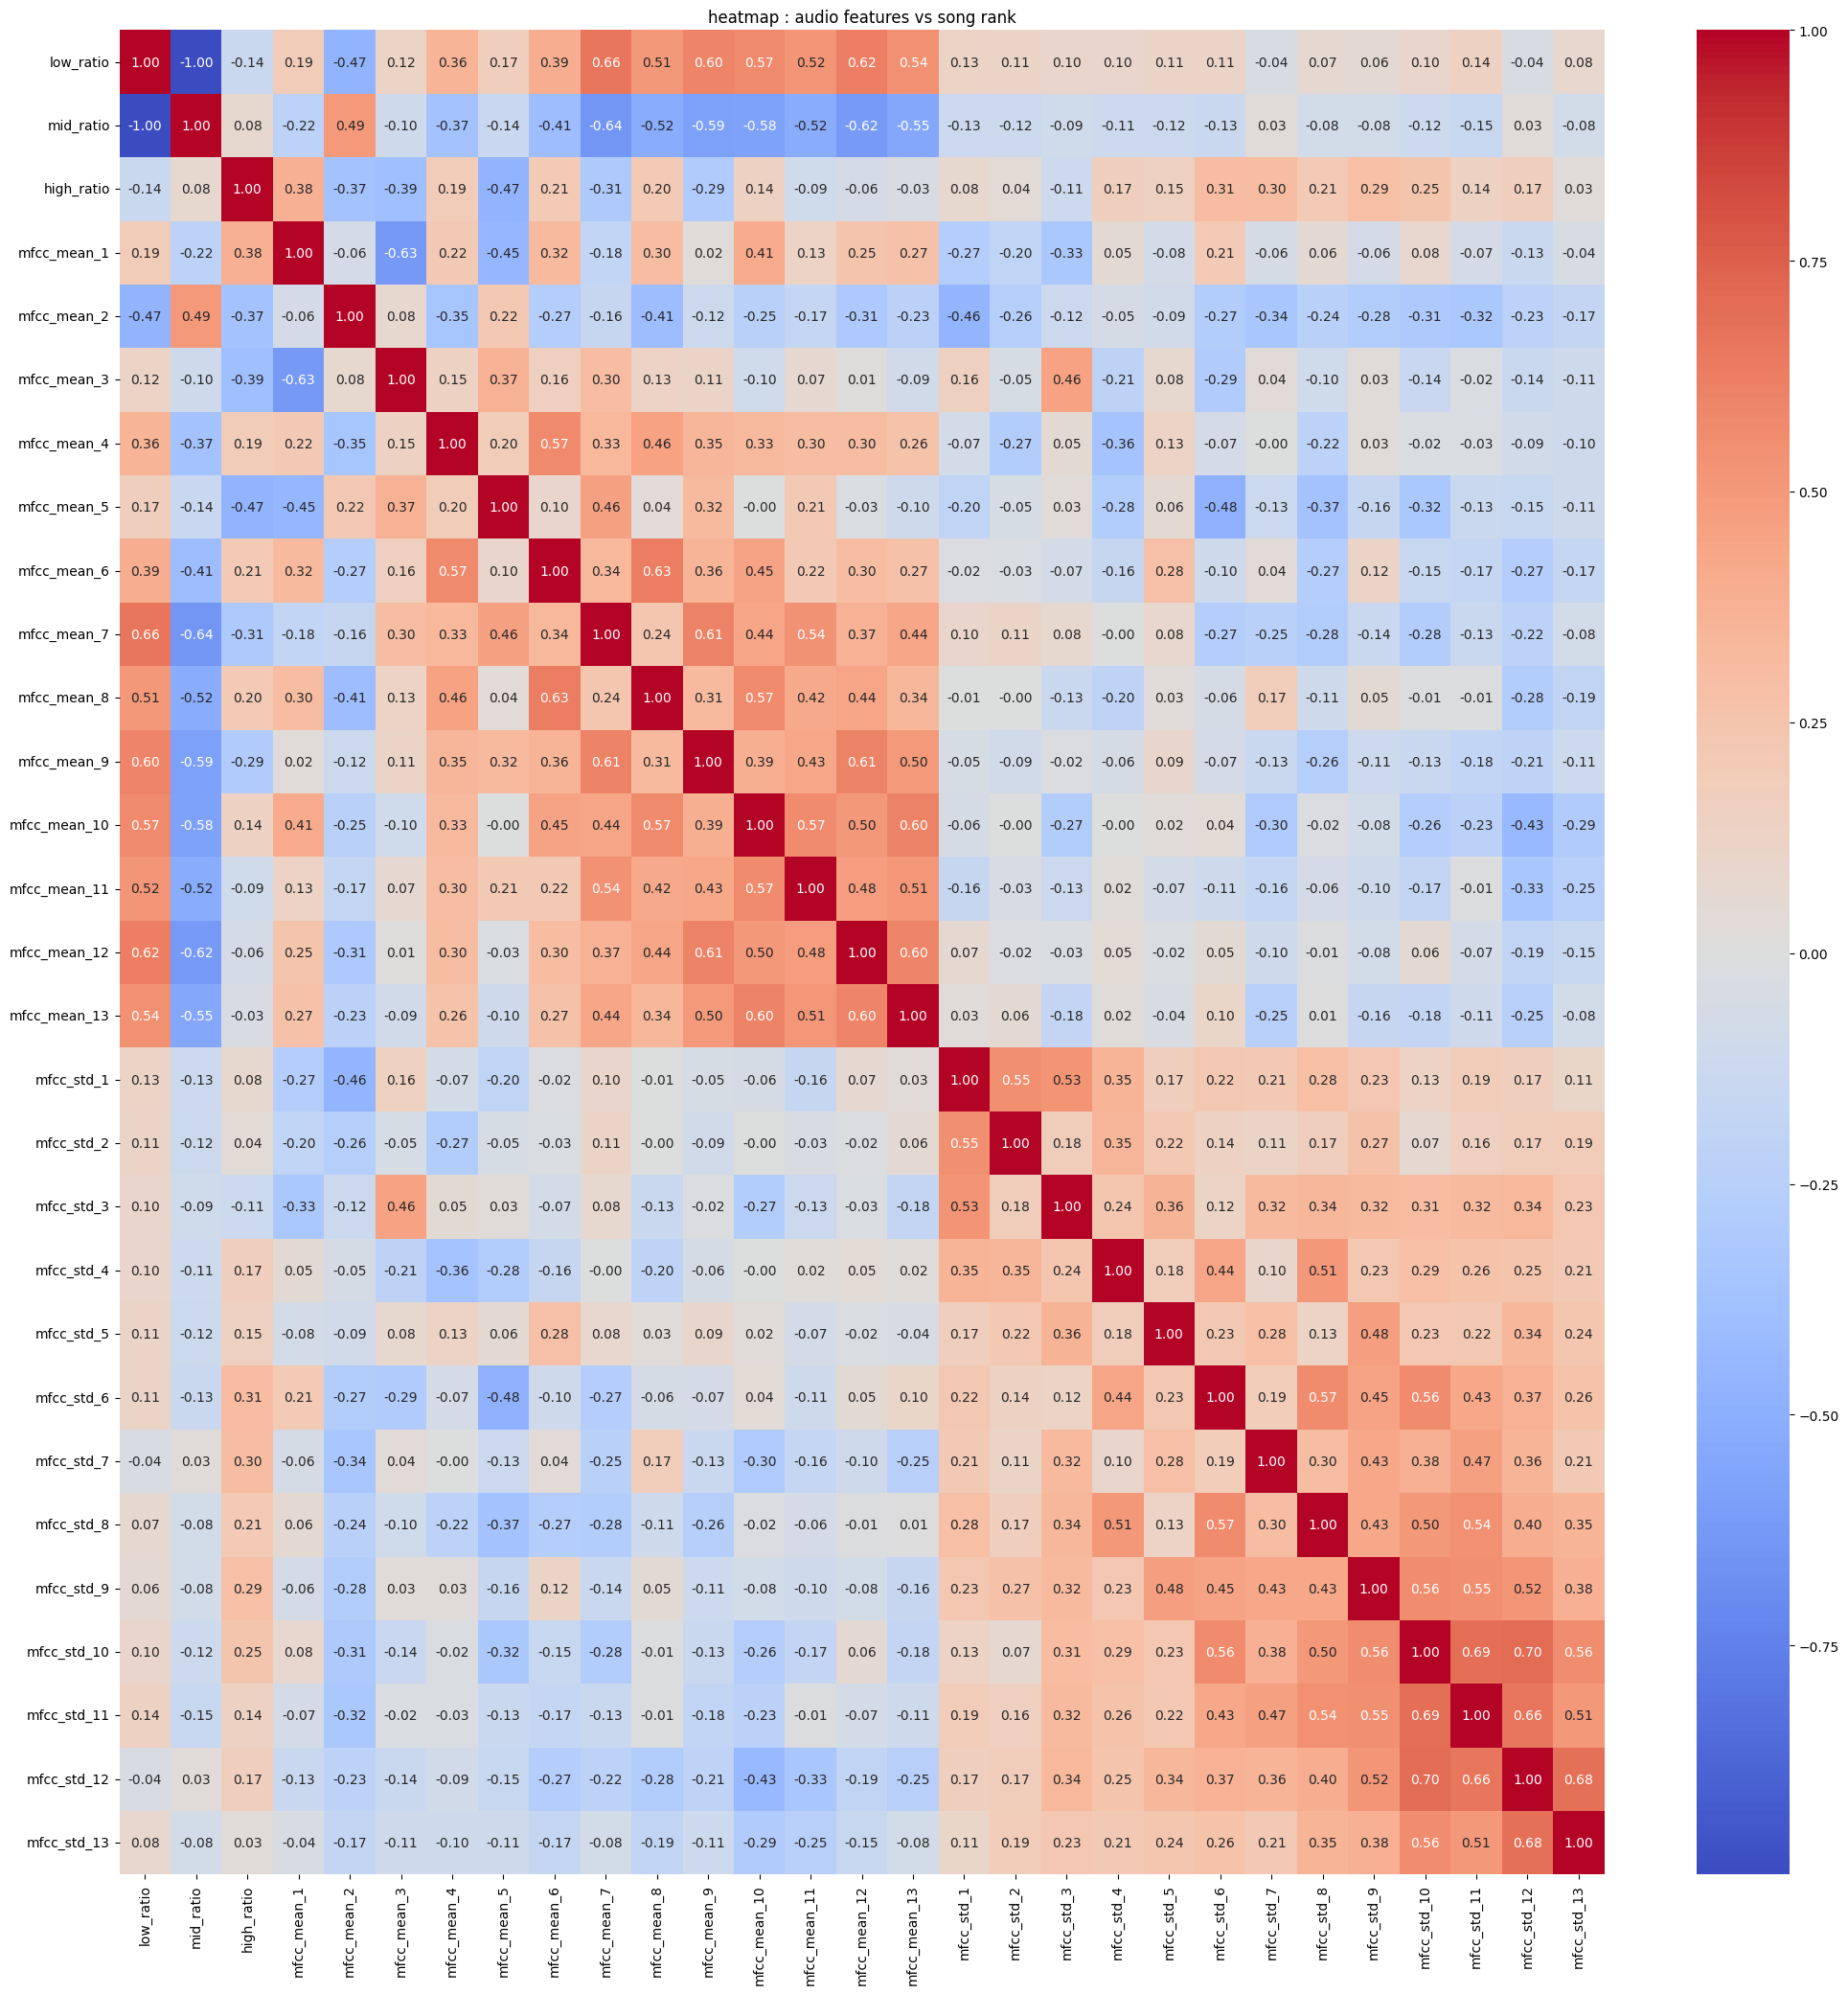

In [62]:
corr_matrix = audio[numeric_cols].corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix,
            annot = True,
            fmt = ".2f",
            cmap = 'coolwarm'
            )
plt.title('heatmap : audio features vs song rank')

In [63]:
final_df.head()

,merge_artist,merge_title,rank,lyrics,year_song,low_ratio,mid_ratio,high_ratio,lyrics_clean
0,bad bunny,efecto,35,\nYeah-yeah-yeah-yeah-yeah-yeah\nEh-eh-eh-eh\n...,2022,0.617687,0.377578,0.004735,yeahyeahyeahyeahyeahyeah eheheheh no s si es c...
1,bad bunny,moscow mule,17,"\nSi yo no te escribo, tú no me escribe', ey\n...",2022,0.638531,0.351680,0.009789,si yo no te escribo t no me escribe ey si t qu...
2,bad bunny,where she goes,8,"\nBaby, dime la verdad\nSi te olvidaste de mí\...",2023,0.313138,0.680006,0.006856,baby dime la verdad si te olvidaste de m yo s ...
3,bad bunny & bomba estereo,ojitos lindos,50,\nHace mucho tiempo le hago caso al corazón\nY...,2022,0.346197,0.642525,0.011278,hace mucho tiempo le hago caso al corazn y pas...
4,bad bunny & chencho corleone,me porto bonito,8,"\nYeah-yeah-yeah-yeah-yeah-yeah, ey\nEn la gua...",2022,0.695150,0.298872,0.005978,yeahyeahyeahyeahyeahyeah ey en la guagua se qu...


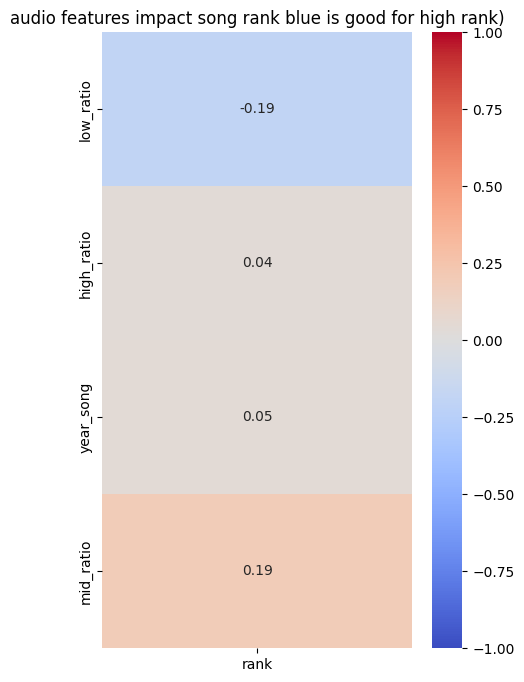

In [64]:
numeric_df = final_df.select_dtypes(include=['number'])
corr_rank = numeric_df.corr()[['rank']].sort_values(by = 'rank', ascending = True)

plt.figure(figsize=(5, 8))
sns.heatmap(corr_rank.drop('rank'), annot = True, fmt=".2f", cmap='coolwarm', vmin = -1, vmax = 1)
plt.title("audio features impact song rank blue is good for high rank)")
plt.show()

In [65]:
numeric_cols = final_df.select_dtypes(include=[np.number]).columns.tolist()
correlations = final_df[numeric_cols].corr()['rank'].drop('rank')
# numeric_cols
# correlations

In [66]:
threshold = 0.1
selected_features = correlations[correlations.abs() > threshold].index.tolist()
selected_features
# len(selected_features)

['low_ratio', 'mid_ratio']

In [67]:
X_audio_selected = final_df[selected_features]
scaler = StandardScaler()
X_audio_scaled = scaler.fit_transform(X_audio_selected)

X_combined = hstack([X_text, X_audio_scaled])
y = (final_df['rank'] <= 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(n_estimators = 1000, random_state = 42, class_weight = 'balanced')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.75

In [68]:
for i in selected_features:
    corr_val = correlations[i]
    direction = "good feature for high rank" if corr_val < 0 else "low rank"
    print(f"{i:20} : {corr_val:.3f} [{direction}]")

low_ratio            : -0.194 [good feature for high rank]
mid_ratio            : 0.193 [low rank]


In [69]:
joblib.dump(model, 'billboard_hit_model.pkl')
joblib.dump(scaler, 'billboard_scaler.pkl')
joblib.dump(vectorizer, 'billboard_vectorizer.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

['selected_features.pkl']

## Test

In [70]:
chart = b.ChartData('pop-songs', date = '2025-10-01')
# chart.title

In [72]:
song_lib = []

for song in chart:
    song_lib.append({
        'rank': song.rank,
        'title': song.title,
        'artist': song.artist
    })

for i in song_lib[:10]:
  print(i)

{'rank': 1, 'title': 'Ordinary', 'artist': 'Alex Warren'}
{'rank': 2, 'title': 'Daisies', 'artist': 'Justin Bieber'}
{'rank': 3, 'title': 'Love Me Not', 'artist': 'Ravyn Lenae'}
{'rank': 4, 'title': 'Undressed', 'artist': 'sombr'}
{'rank': 5, 'title': 'Golden', 'artist': 'HUNTR/X: EJAE, Audrey Nuna & REI AMI'}
{'rank': 6, 'title': 'What I Want', 'artist': 'Morgan Wallen Featuring Tate McRae'}
{'rank': 7, 'title': 'Manchild', 'artist': 'Sabrina Carpenter'}
{'rank': 8, 'title': 'Mystical Magical', 'artist': 'Benson Boone'}
{'rank': 9, 'title': 'Revolving Door', 'artist': 'Tate McRae'}
{'rank': 10, 'title': 'Mutt', 'artist': 'Leon Thomas'}


# 5. Model in Action: Predicting Recent & Custom Songs

In [74]:
json_file = 'my_custom_songs.json'

if os.path.exists(json_file):
    if os.path.getsize(json_file) > 0:
        with open(json_file, 'r', encoding='utf-8') as f:
            my_custom_songs = json.load(f)

        df_songs = pd.DataFrame(my_custom_songs)
        display(df_songs.head())
    else:
        print("file is empty")
else:
    print("no file")

,rank,title,artist,lyrics
0,1,Ordinary,Alex Warren,"They say, ""The holy water's watered down\nAnd ..."
1,2,Daisies,Justin Bieber,Throwing pedals like do you love me or not\nHe...
2,3,Love Me Not,Ravyn Lenae,"See, right now, I need you, I'll meet you some..."
3,4,Undressed,sombr,"You had a dream, you wanted better\nYou were s..."
4,5,Golden,"HUNTR/X: EJAE, Audrey Nuna & REI AMI","I was a ghost, I was alone (hah)\n어두워진 앞길 속에 (..."


In [75]:
my_custom_songs[0]

{'rank': 1,
 'title': 'Ordinary',
 'artist': 'Alex Warren',
 'lyrics': 'They say, "The holy water\'s watered down\nAnd this town\'s lost its faith\nOur colors will fade eventually"\nSo if our time is runnin\' out\nDay after day\nWe\'ll make the mundane our masterpiece\nOh my, my\nOh my, my love\nI take one look at you\nYou\'re takin\' me out of the ordinary\nI want you layin\' me down \'til we\'re dead and buried\nOn the edge of your knife, stayin\' drunk on your vine\nThe angels up in the clouds are jealous, knowin\' we found\nSomethin\' so out of the ordinary\nYou got me kissin\' the ground of your sanctuary\nShatter me with your touch, oh Lord, return me to dust\nThe angels up in the clouds are jealous, knowin\' we found\nHopeless Hallelujah\nOn this side of Heaven\'s gate\nOh, my life, how do ya\nBreathe and take my breath away?\nAt your altar, I will pray\nYou\'re the sculptor, I\'m the clay\nOh my, my\nYou\'re takin\' me out of the ordinary\nI want you layin\' me down \'til we\'r

In [76]:
df_songs = pd.DataFrame(my_custom_songs)
df_songs.to_csv("my_custom_songs.csv", index = False, encoding = "utf-8")

In [77]:
success_mean = final_df[final_df['rank'] <= 30][selected_features].mean()
audio_input_df = pd.DataFrame([success_mean.values], columns=selected_features)
audio_scaled = scaler.transform(audio_input_df)

In [79]:
audio.head(3)

,filename,low_ratio,mid_ratio,high_ratio,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,...,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,merge_artist,merge_title
0,Bad Bunny & Bomba Estereo_Ojitos Lindos.wav,0.346197,0.642525,0.011278,-209.203079,182.064758,-2.384764,40.098114,-1.102309,6.859411,...,14.765157,16.040352,12.071749,11.587193,10.576082,10.226145,13.103971,9.926713,bad bunny & bomba estereo,ojitos lindos
1,Bad Bunny & Chencho Corleone_Me Porto Bonito.wav,0.695150,0.298872,0.005978,-232.624298,115.545059,7.741221,28.303684,9.890562,24.111898,...,14.657878,24.288233,12.170394,11.735451,15.774083,12.665260,12.378709,10.191256,bad bunny & chencho corleone,me porto bonito
2,Bad Bunny_Efecto.wav,0.617687,0.377578,0.004735,-263.571075,138.516769,10.775496,38.367397,-1.038293,26.877401,...,22.365086,15.909713,12.626781,13.847604,15.169734,11.067740,12.742627,11.131393,bad bunny,efecto


In [81]:
results = []

for song in my_custom_songs:
    clean_text = clean_lyrics(song['lyrics'])
    text_vec = vectorizer.transform([clean_text])
    if issparse(text_vec):
        text_vec = text_vec.toarray()

    final_input = np.hstack([text_vec, audio_scaled])
    score = model.predict_proba(final_input)[0][1] * 100

    results.append({
        'Actual Rank': song['rank'],
        'Title': song['title'],
        'Artist': song['artist'],
        'Model Score': score
    })

df_results = pd.DataFrame(results).sort_values(by = 'Model Score', ascending = False)
df_results['Predicted Rank'] = range(1, len(df_results) + 1)

print("\nValidation Results - Model Predicted Rank vs Actual Rank")
df_results[['Predicted Rank', 'Actual Rank', 'Title', 'Artist', 'Model Score']]


Validation Results - Model Predicted Rank vs Actual Rank


,Predicted Rank,Actual Rank,Title,Artist,Model Score
1,1,2,Daisies,Justin Bieber,89.2
6,2,7,Manchild,Sabrina Carpenter,86.7
19,3,20,Gabriela,KATSEYE,86.3
17,4,18,All The Way,BigXthaPlug Featuring Bailey,84.3
8,5,9,Revolving Door,Tate McRae,84.1
4,6,5,Golden,"HUNTR/X: EJAE, Audrey Nuna & REI AMI",83.0
7,7,8,Mystical Magical,Benson Boone,79.3
9,8,10,Mutt,Leon Thomas,76.6
15,9,16,Party 4 U,Charli xcx,75.6
2,10,3,Love Me Not,Ravyn Lenae,75.0


## test with recent songs

In [82]:
new_audio_df = pd.read_csv('audio_features_audio2.csv')
new_audio_df.head()

,filename,low_ratio,mid_ratio,high_ratio,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,...,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13
0,Alex Warren_Ordinary.wav,0.368930,0.626933,0.004137,-258.834229,162.908142,11.320369,25.526335,-2.733947,15.444230,...,25.560108,16.888374,18.649380,11.690351,15.146327,14.087523,14.928558,9.794117,8.185650,10.738557
1,Benson Boone_Mystical Magical.wav,0.595020,0.365684,0.039296,-136.206650,137.886337,-18.755941,46.967278,-6.521931,21.431520,...,24.664474,20.329889,17.924377,14.148984,15.071345,11.634433,11.046006,10.516715,10.475721,10.635731
2,Benson Boone_Sorry I'm Here For Someone Else.wav,0.610297,0.363638,0.026064,-131.519379,138.922195,-24.253498,43.274277,-14.501987,23.953312,...,24.088606,16.557217,15.110559,13.420815,14.555690,11.966599,10.668346,9.817291,11.792492,10.317224
3,BigXthaPlug Featuring Bailey Zimmerman_All The...,0.193080,0.760496,0.046424,-171.914688,148.406464,-22.979265,38.494991,-24.726328,17.454504,...,29.692497,24.377384,19.540934,18.930807,13.422353,13.518588,12.572927,10.557369,11.910135,9.328650
4,Chappell Roan_Pink Pony Club.wav,0.304344,0.687346,0.008310,-257.841309,177.391602,15.980700,20.229755,-6.018373,15.221737,...,30.781849,18.470741,11.902449,14.179115,9.928160,9.885686,10.218414,8.777418,11.361154,8.210282


In [83]:
temp = audio['filename'].str.replace('.wav', '', regex = False)
split = temp.str.split('_', n = 1, expand = True)
split.head(3)

,0,1
0,Bad Bunny & Bomba Estereo,Ojitos Lindos
1,Bad Bunny & Chencho Corleone,Me Porto Bonito
2,Bad Bunny,Efecto


In [84]:
new_audio_df['temp'] = new_audio_df['filename'].str.replace('.wav', '', regex = False)
split_data = new_audio_df['temp'].str.split('_', n = 1, expand=True)

In [85]:
new_audio_df['join_artist'] = split_data[0].astype(str).str.strip().str.lower()
new_audio_df['join_title'] = split_data[1].astype(str).str.strip().str.lower()

In [88]:
lyrics_df = pd.DataFrame(my_custom_songs)
lyrics_df['join_title'] = lyrics_df['title'].astype(str).str.strip().str.lower()
merged_val_df = pd.merge(lyrics_df, new_audio_df, on = 'join_title', how = 'inner')
merged_val_df.head(3)

,rank,title,artist,lyrics,join_title,filename,low_ratio,mid_ratio,high_ratio,mfcc_mean_1,...,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,temp,join_artist
0,1,Ordinary,Alex Warren,"They say, ""The holy water's watered down\nAnd ...",ordinary,Alex Warren_Ordinary.wav,0.368930,0.626933,0.004137,-258.834229,...,18.649380,11.690351,15.146327,14.087523,14.928558,9.794117,8.185650,10.738557,Alex Warren_Ordinary,alex warren
1,2,Daisies,Justin Bieber,Throwing pedals like do you love me or not\nHe...,daisies,Justin Bieber_Daisies.wav,0.881689,0.115780,0.002531,-275.624359,...,12.239429,12.713236,11.867664,9.124905,7.906434,7.202639,6.820352,6.873232,Justin Bieber_Daisies,justin bieber
2,3,Love Me Not,Ravyn Lenae,"See, right now, I need you, I'll meet you some...",love me not,Ravyn Lenae_Love Me Not.wav,0.754382,0.229361,0.016258,-223.040970,...,17.015688,9.763829,8.924979,6.778359,7.329726,7.492792,7.576218,6.741035,Ravyn Lenae_Love Me Not,ravyn lenae


In [89]:
results = []

merged_val_df['clean_lyrics'] = merged_val_df['lyrics'].apply(clean_lyrics)
text_vec = vectorizer.transform(merged_val_df['clean_lyrics'])
if issparse(text_vec):
    text_vec = text_vec.toarray()


In [90]:
audio_features = merged_val_df[selected_features]
audio_scaled = scaler.transform(audio_features)

final_input = np.hstack([text_vec, audio_scaled])
score = model.predict_proba(final_input)[:, 1] * 100
merged_val_df['model score'] = score
merged_val_df.head(2)

,rank,title,artist,lyrics,join_title,filename,low_ratio,mid_ratio,high_ratio,mfcc_mean_1,...,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,temp,join_artist,clean_lyrics,model score
0,1,Ordinary,Alex Warren,"They say, ""The holy water's watered down\nAnd ...",ordinary,Alex Warren_Ordinary.wav,0.368930,0.626933,0.004137,-258.834229,...,15.146327,14.087523,14.928558,9.794117,8.185650,10.738557,Alex Warren_Ordinary,alex warren,they say the holy waters watered down and this...,65.5
1,2,Daisies,Justin Bieber,Throwing pedals like do you love me or not\nHe...,daisies,Justin Bieber_Daisies.wav,0.881689,0.115780,0.002531,-275.624359,...,11.867664,9.124905,7.906434,7.202639,6.820352,6.873232,Justin Bieber_Daisies,justin bieber,throwing pedals like do you love me or not hea...,92.5


In [91]:
final_result = merged_val_df[['rank', 'title', 'artist', 'model score']].sort_values(by = 'model score', ascending = False)
final_result['Predicted Rank'] = range(1, len(final_result) + 1)

print("\n[Final Verification] Actual Audio + Lyrics Based Prediction Ranking")
display(final_result[['Predicted Rank', 'rank', 'title', 'artist', 'model score']])


[Final Verification] Actual Audio + Lyrics Based Prediction Ranking


,Predicted Rank,rank,title,artist,model score
1,1,2,Daisies,Justin Bieber,92.5
6,2,7,Manchild,Sabrina Carpenter,86.6
18,3,20,Gabriela,KATSEYE,85.6
4,4,5,Golden,"HUNTR/X: EJAE, Audrey Nuna & REI AMI",85.3
8,5,9,Revolving Door,Tate McRae,84.2
17,6,18,All The Way,BigXthaPlug Featuring Bailey,82.5
9,7,10,Mutt,Leon Thomas,80.1
7,8,8,Mystical Magical,Benson Boone,79.1
2,9,3,Love Me Not,Ravyn Lenae,78.6
15,10,16,Party 4 U,Charli xcx,76.1


In [93]:
corr = final_result['rank'].corr(final_result['model score'])
print("Correlation between actual rank and predicted score: " + str(round(corr, 4)))
if corr < 0:
    print("- means success Higher rank (1st) means higher score)")
else:
    print("+ means disappointment, model may be predicting ranks in reverse)")


Correlation between actual rank and predicted score: -0.0821
- means success Higher rank (1st) means higher score)
